### Comparative Study of Electric Vehicle Specifications and Capabilities

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Imputation
from sklearn.impute import KNNImputer  

# Notebook display settings 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# print(plt.style.available)

# Set plotting style and defaults
plt.style.use('seaborn-v0_8-white')

plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'grid.color': 'gray',
    'text.color': 'black',
})

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/el_vehicles.csv')  # Load electric vehicles data from a relative path

# Display the first 10 rows, the last 5 rows, and 5 random rows from the DataFrame
print(df.head(10))  
print(df.tail(5))   
print(df.sample(5)) 

# Info method: provides an overview of the dataset structure, including data types and non-null counts
df.info()  # Display summary information about the DataFrame

    brand                                 model  top_speed_kmh  \
0  Abarth                      500e Convertible            155   
1  Abarth                        500e Hatchback            155   
2  Abarth                   600e Scorpionissima            200   
3  Abarth                          600e Turismo            200   
4  Aiways                                    U5            150   
5  Aiways                                    U6            160   
6    Alfa         Romeo Junior Elettrica 54 kWh            150   
7    Alfa  Romeo Junior Elettrica 54 kWh Veloce            200   
8  Alpine                  A290 Electric 180 hp            160   
9  Alpine                  A290 Electric 220 hp            170   

   battery_capacity_kWh battery_type  number_of_cells  torque_nm  \
0                  37.8  Lithium-ion            192.0      235.0   
1                  37.8  Lithium-ion            192.0      235.0   
2                  50.8  Lithium-ion            102.0      345.0   
3

In [3]:
print("shape:", df.shape) # Number of rows and columns to confirm dataset size
print("columns:", df.columns.tolist()) # Lists all column names for inspection and referencing

shape: (480, 22)
columns: ['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh', 'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats', 'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm', 'car_body_type', 'source_url']


In [4]:
print(df.dtypes) # Displays the data type of each column to identify numeric vs. object types
# Total memory footprint to assess resource needs
print(df.memory_usage(deep=True).sum(), "bytes")

brand                         object
model                         object
top_speed_kmh                  int64
battery_capacity_kWh         float64
battery_type                  object
number_of_cells              float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
fast_charge_port              object
towing_capacity_kg           float64
cargo_volume_l                object
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
source_url                    object
dtype: object
314853 bytes


In [5]:
print(df.describe().T)  # Numeric — summarizes statistical measures for numeric columns (count, mean, std, min, quartiles, max)
print(df.describe(include='all').T) # Include non-numeric — summarizes both numeric and non-numeric columns, including counts and top values

                           count         mean          std     min     25%  \
top_speed_kmh              480.0   185.579167    34.229332   125.0   160.0   
battery_capacity_kWh       480.0    74.044375    20.293757    21.3    60.0   
number_of_cells            276.0   485.293478  1210.819733    72.0   150.0   
torque_nm                  473.0   498.433404   241.378273   113.0   310.0   
efficiency_wh_per_km       480.0   162.997917    34.284850   109.0   143.0   
range_km                   480.0   393.375000   103.117709   135.0   320.0   
acceleration_0_100_s       480.0     6.874583     2.728681     2.2     4.8   
fast_charging_power_kw_dc  479.0   124.958246    58.099957    29.0    80.0   
towing_capacity_kg         454.0  1054.674009   737.116235     0.0   500.0   
seats                      480.0     5.262500     1.002007     2.0     5.0   
length_mm                  480.0  4678.941667   368.500580  3620.0  4440.0   
width_mm                   480.0  1887.212500    73.538230  1610

In [6]:
print(df.isnull().sum()) # Counts missing values per column to identify completeness issues
print((df.isnull().mean() * 100).round(2))  # Percent null per column to quickly prioritize columns for cleaning

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              204
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                   468
dtype: int64
brand                         0.00
model                         0.21
top_speed_kmh                 0.00
battery_capacity_kWh          0.00
battery_type                  0.00
number_of_cells              42.50
torque_nm                     1.46
efficiency_wh_pe

In [7]:
before = len(df)
print(f"Rows before removing duplicates: {before}") # Record row count before deduplication

duplicates = df.duplicated().sum()  # Count exact duplicate rows for assessment
print(f"Duplicate rows found: {duplicates}")

df.drop_duplicates(inplace=True) # Remove duplicate rows 

after = len(df)
print(f"Rows after removing duplicates: {after}") # Record row count after deduplication

print(f"Rows after: {after} (removed {before - after}, duplicates found {duplicates})") # Summary of deduplication results

Rows before removing duplicates: 480
Duplicate rows found: 2
Rows after removing duplicates: 478
Rows after: 478 (removed 2, duplicates found 2)


In [8]:
# Show top 10 most frequent values for specific columns (including NaN)
for col in ['brand', 'torque_nm', 'model']:
    if col in df.columns:
        print(col, df[col].value_counts(dropna=False).head(10))  

brand brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             22
BMW              20
Peugeot          19
Volvo            18
BYD              17
Smart            17
Name: count, dtype: int64
torque_nm torque_nm
260.0    30
310.0    21
343.0    15
350.0    15
545.0    14
679.0    14
700.0    13
345.0    12
220.0    11
270.0    11
Name: count, dtype: int64
model model
500e Convertible                        1
e-Traveller L2 50 kWh                   1
4 Long Range Single Motor               1
4 Long Range Dual Motor                 1
3 Long Range Single motor               1
3 Long Range Performance                1
3 Long Range Dual motor                 1
2 Standard Range Single Motor (MY26)    1
2 Long Range Single Motor (MY26)        1
2 Long Range Performance (MY26)         1
Name: count, dtype: int64


In [9]:
# Check if column 'source_url'  exist before dropping
df.drop(columns=[c for c in ['source_url'] if c in df.columns], inplace=True)
print("\nColumns after dropping 'source_url':")
print(df.columns.tolist())


Columns after dropping 'source_url':
['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh', 'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats', 'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm', 'car_body_type']


In [10]:
# Shows number of unique values per column and providing a quick overview of the diversity of data within the dataset: (detect identifiers, low-cardinality fields, or potential keys)
print(df.nunique())  

brand                         59
model                        477
top_speed_kmh                 38
battery_capacity_kWh         121
battery_type                   1
number_of_cells               38
torque_nm                    128
efficiency_wh_per_km         112
range_km                      88
acceleration_0_100_s          97
fast_charging_power_kw_dc     71
fast_charge_port               2
towing_capacity_kg            26
cargo_volume_l               140
seats                          7
drivetrain                     3
segment                       15
length_mm                    172
width_mm                     108
height_mm                    162
car_body_type                  8
dtype: int64


In [11]:
# List of columns to inspect for unique values to help identify categories, unexpected entries, and data-cleaning needs
columns_to_check = [
    'brand','model','top_speed_kmh','battery_capacity_kWh','battery_type','number_of_cells','torque_nm',
    'efficiency_wh_per_km','range_km','acceleration_0_100_s','fast_charging_power_kw_dc','fast_charge_port',
    'towing_capacity_kg','cargo_volume_l','seats','drivetrain','segment','length_mm','width_mm','height_mm','car_body_type'
]

# Build a dictionary of unique values per column to quickly surface possible anomalies, typos, and categorical levels for preprocessing
unique_values = {col: df[col].unique() for col in columns_to_check}

# Print each column's unique values s
for col, unique in unique_values.items():
    print(f"{col}: {unique}")

brand: ['Abarth' 'Aiways' 'Alfa' 'Alpine' 'Audi' 'BMW' 'BYD' 'CUPRA' 'Cadillac'
 'Citroen' 'DS' 'Dacia' 'Dongfeng' 'Elaris' 'Fiat' 'Ford' 'GWM' 'Genesis'
 'Honda' 'Hongqi' 'Hyundai' 'Jaguar' 'Jeep' 'KGM' 'Kia' 'Lancia'
 'Leapmotor' 'Lexus' 'Lotus' 'Lucid' 'Lynk&Co' 'MG' 'Maserati' 'Maxus'
 'Mazda' 'Mercedes-Benz' 'Mini' 'NIO' 'Nissan' 'Omoda' 'Opel' 'Peugeot'
 'Polestar' 'Porsche' 'Renault' 'Rolls-Royce' 'Skoda' 'Skywell' 'Smart'
 'Subaru' 'Tesla' 'Toyota' 'VinFast' 'Volkswagen' 'Volvo' 'Voyah' 'XPENG'
 'Zeekr' 'Firefly']
model: ['500e Convertible' '500e Hatchback' '600e Scorpionissima' '600e Turismo'
 'U5' 'U6' 'Romeo Junior Elettrica 54 kWh'
 'Romeo Junior Elettrica 54 kWh Veloce' 'A290 Electric 180 hp'
 'A290 Electric 220 hp' 'A6 Avant e-tron' 'A6 Avant e-tron performance'
 'A6 Avant e-tron quattro' 'A6 Sportback e-tron'
 'A6 Sportback e-tron performance' 'A6 Sportback e-tron quattro'
 'Q4 Sportback e-tron 40' 'Q4 Sportback e-tron 45'
 'Q4 Sportback e-tron 45 quattro' 'Q4 Sportback 

In [12]:
# Detect text columns that contain numeric-like strings and flag columns that may need conversion to numeric types
for c in df.columns:
    if df[c].dtype == object and df[c].str.isnumeric().any():
        print("possible numeric-as-string:", c)

possible numeric-as-string: model
possible numeric-as-string: cargo_volume_l


In [13]:
# Replace None in 'model' with a descriptive missing marker
df['model'] = df['model'].replace({None: 'Subcompact car (B)'})

# Show tail of brand/model to confirm replacement
print("\nAfter replacing None with pd.NA in 'model' (tail):")
print(df[['brand','model']].tail())

# Fill number_of_cells by brand median then global median
df['number_of_cells'] = df['number_of_cells'].fillna(
    df.groupby('brand')['number_of_cells'].transform('median')
).fillna(df['number_of_cells'].median())

# Fill torque with its mean
df['torque_nm'] = df['torque_nm'].fillna(df['torque_nm'].mean())

# Null counts for the multivariate block
print("\nCounts of nulls before multivariate imputation:")
print(df[['fast_charging_power_kw_dc','torque_nm','range_km','battery_capacity_kWh']].isna().sum())

# Ensure numeric types for imputation columns
num_cols = ['fast_charging_power_kw_dc','torque_nm','range_km','battery_capacity_kWh']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Run KNN imputer and reassign results
df[num_cols] = pd.DataFrame(
    KNNImputer(
        n_neighbors=5,
        weights='distance',
        metric='nan_euclidean'
    ).fit_transform(df[num_cols]),
    columns=num_cols,
    index=df.index
)

# Null counts and sample after imputation
print("\nCounts of nulls after KNN imputation:")
print(df[num_cols].isna().sum())

print("\nKNN imputation diagnostics (sample):")
print(df[num_cols].sample())

# Fill categorical fast_charge_port with its mode
df['fast_charge_port'] = df['fast_charge_port'].fillna(df['fast_charge_port'].mode().iat[0])

# Normalize CHAdeMO to CCS after trimming whitespace
df.loc[df['fast_charge_port'].str.strip().eq('CHAdeMO'), 'fast_charge_port'] = 'CCS'

# Show counts for fast_charge_port
print("\nfast_charge_port value counts after cleaning:")
print(df['fast_charge_port'].value_counts(dropna=False))

# Preview cargo_volume_1 column
print("\nUnique values sample in 'cargo_volume_l' before cleaning:")
print(df['cargo_volume_l'].dropna().unique()[:10])

# Remove literal suffix then coerce to numeric and fill missing with median 
cargo_num = pd.to_numeric(df['cargo_volume_l'].astype(
    str).str.replace(' Banana Boxes', '', regex=False), errors='coerce') 
df['cargo_volume_l'] = cargo_num.fillna(cargo_num.median())

# Summary stats for cargo_volume_l
print("\n'cargo_volume_l' summary after cleaning:")
print(df['cargo_volume_l'].describe())

# Final null counts for key columns
print("\nFinal null counts for relevant columns:")
print(df[['model'] + num_cols + ['fast_charge_port','cargo_volume_l']].isna().sum())

# Print first 10 rows as final sample
print("\nDataFrame sample after all cleaning (first 10 rows):")
print(df.head(10))


After replacing None with pd.NA in 'model' (tail):
       brand                    model
475    Zeekr           7X Premium RWD
476    Zeekr        X Core RWD (MY25)
477    Zeekr  X Long Range RWD (MY25)
478    Zeekr   X Privilege AWD (MY25)
479  Firefly       Subcompact car (B)

Counts of nulls before multivariate imputation:
fast_charging_power_kw_dc    1
torque_nm                    0
range_km                     0
battery_capacity_kWh         0
dtype: int64

Counts of nulls after KNN imputation:
fast_charging_power_kw_dc    0
torque_nm                    0
range_km                     0
battery_capacity_kWh         0
dtype: int64

KNN imputation diagnostics (sample):
     fast_charging_power_kw_dc  torque_nm  range_km  battery_capacity_kWh
305                       90.0      345.0     380.0                  73.0

fast_charge_port value counts after cleaning:
fast_charge_port
CCS    478
Name: count, dtype: int64

Unique values sample in 'cargo_volume_l' before cleaning:
['185' '360'

In [14]:
# Numeric — extended percentiles to reveal tails and outliers
print(df.select_dtypes(include='number').describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])) 

       top_speed_kmh  battery_capacity_kWh  number_of_cells    torque_nm  \
count     478.000000            478.000000       478.000000   478.000000   
mean      185.487448             74.043724       396.949791   498.012739   
std        34.252773             20.331058       964.930315   239.682853   
min       125.000000             21.300000        72.000000   113.000000   
1%        130.000000             28.080000        93.000000   125.000000   
5%        132.000000             43.600000        96.000000   220.000000   
25%       160.000000             60.000000       180.000000   310.000000   
50%       180.000000             76.150000       216.000000   437.500000   
75%       201.000000             90.600000       324.000000   679.000000   
95%       250.000000            106.150000       396.000000   940.000000   
99%       272.760000            118.000000      5676.000000  1172.280000   
max       325.000000            118.000000      7920.000000  1350.000000   

       effi

In [15]:
# Brand-level towing capacity cleanup and imputation
# Convert 0s to NaN and coerce any non-numeric to NaN 
tc = pd.to_numeric(df['towing_capacity_kg'].replace(0, np.nan), errors='coerce')

# Per-brand forward- then backward-fill to propagate existing values within each brand and  reset_index
df['towing_capacity_kg'] = tc.groupby(df['brand']).apply(lambda x: x.ffill().bfill()).reset_index(level=0, drop=True)

# Compute per-brand median for use as a sensible brand-level fallback
med = df.groupby('brand')['towing_capacity_kg'].median()

# Fill remaining NaNs with the brand median where available, then fallback to overall median
df['towing_capacity_kg'] = df['towing_capacity_kg'].fillna(df['brand'].map(med)).fillna(df['towing_capacity_kg'].median())

# Diagnostics: show counts and remaining missing per brand for verification
print(df.groupby('brand').agg(
    total=('towing_capacity_kg','size'),
    missing=('towing_capacity_kg', lambda s: s.isna().sum())
).sort_values('missing', ascending=False))
print('Total missing:', df['towing_capacity_kg'].isna().sum())

               total  missing
brand                        
Abarth             4        0
Porsche           26        0
MG                12        0
Maserati           3        0
Maxus              1        0
Mazda              2        0
Mercedes-Benz     42        0
Mini               8        0
NIO               12        0
Nissan             6        0
Omoda              1        0
Opel              14        0
Peugeot           19        0
Polestar           9        0
Renault           11        0
Lucid              3        0
Rolls-Royce        1        0
Skoda             12        0
Skywell            2        0
Smart             17        0
Subaru             1        0
Tesla             11        0
Toyota             7        0
VinFast            2        0
Volkswagen        23        0
Volvo             18        0
Voyah              1        0
XPENG              9        0
Lynk&Co            1        0
Lotus              6        0
Aiways             2        0
Fiat      

In [16]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Series([], dtype: int64)


In [17]:
# Rename column: 'model' to 'car_model'
df = df.rename(columns={'model': 'car_model'})
print("\nDataFrame after renaming 'model' to 'car_model':")
print(df.head())


DataFrame after renaming 'model' to 'car_model':
    brand            car_model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156     225.0   
1  Lithium-ion            192.0      235.0                   149     225.0   
2  Lithium-ion            102.0      345.0                   158     280.0   
3  Lithium-ion            102.0      345.0                   158     280.0   
4  Lithium-ion            216.0      310.0                   156     315.0   

   acceleration_0_100_s  ...  fast_charge_port towing_

###  *_Data Preparation: Cleaning, Imputation & Feature Engineering_*

In [18]:
# Create a mapping dictionary to associate car brands with their respective manufacturing countries
brand_to_country = {
    "Abarth":"Italy","Aiways":"China","Alfa":"Italy","Alpine":"France",
    "Audi":"Germany","BMW":"Germany","BYD":"China","CUPRA":"Spain",
    "Cadillac":"USA","Citroen":"France","DS":"France","Dacia":"Romania",
    "Dongfeng":"China","Elaris":"Germany","Fiat":"Italy","Ford":"USA",
    "GWM":"China","Genesis":"Korea","Honda":"Japan","Hongqi":"China",
    "Hyundai":"Korea","Jaguar":"UK","Jeep":"USA","KGM":"Korea","Kia":"Korea",
    "Lancia":"Italy","Leapmotor":"China","Lexus":"Japan","Lotus":"UK",
    "Lucid":"USA","Lynk&Co":"China","MG":"UK","Maserati":"Italy",
    "Maxus":"China","Mazda":"Japan","Mercedes-Benz":"Germany","Mini":"UK",
    "NIO":"China","Nissan":"Japan","Omoda":"China","Opel":"Germany",
    "Peugeot":"France","Polestar":"Sweden/China","Porsche":"Germany",
    "Renault":"France","Rolls-Royce":"UK","Skoda":"Czech Republic",
    "Skywell":"China","Smart":"Germany","Subaru":"Japan","Tesla":"USA",
    "Toyota":"Japan","VinFast":"Vietnam","Volkswagen":"Germany","Volvo":"Sweden",
    "Voyah":"China","XPENG":"China","Zeekr":"China","Firefly":"China"
}

# Normalize brand strings by converting them to strings, stripping whitespace, and replacing multiple spaces with a single space
df['brand'] = df['brand'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

# Convert specified columns to numeric types, coercing errors to NaN to handle any non-numeric values
for col in ['fast_charging_power_kw_dc','torque_nm','number_of_cells','battery_capacity_kWh']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Map the 'brand' column to the 'manufacturing_country' using the predefined dictionary
# Replace specific country names for consistency in the dataset
df['manufacturing_country'] = df['brand'].map(brand_to_country).replace(
    {"United Kingdom": "UK", "South Korea": "Korea"}
)

# Identify and list any brands that were not mapped to a manufacturing country to catch potential gaps in the mapping
unmapped = df.loc[df['manufacturing_country'].isna(), 'brand'].unique()
print("Unmapped brands:", unmapped)

# Display the count of each manufacturing country, including NaN values, to understand the distribution of brands
print(df['manufacturing_country'].value_counts(dropna=False))
print(df[['manufacturing_country']])

# Display a random sample of 10 rows
df.sample(10)

Unmapped brands: []
manufacturing_country
Germany           171
China              69
France             49
USA                39
Korea              36
UK                 28
Japan              20
Italy              18
Sweden             18
Czech Republic     12
Sweden/China        9
Spain               5
Romania             2
Vietnam             2
Name: count, dtype: int64
    manufacturing_country
0                   Italy
1                   Italy
2                   Italy
3                   Italy
4                   China
..                    ...
475                 China
476                 China
477                 China
478                 China
479                 China

[478 rows x 1 columns]


,brand,car_model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,manufacturing_country
211,MG,ZS EV Standard Range,175,49.0,Lithium-ion,104.0,280.000000,153,265.0,8.6,...,500.0,448.0,5,FWD,JB - Compact,4323,1809,1649,SUV,UK
329,Porsche,Macan 4 Electric,220,95.0,Lithium-ion,180.0,650.000000,184,470.0,5.2,...,2000.0,540.0,5,AWD,JD - Large,4784,1938,1622,SUV,Germany
85,Citroen,e-C3,135,44.0,Lithium-ion,216.0,120.000000,135,255.0,11.5,...,550.0,310.0,5,FWD,B - Compact,4015,1755,1577,Hatchback,France
184,Lancia,Ypsilon,150,48.1,Lithium-ion,96.0,260.000000,122,310.0,8.2,...,1500.0,309.0,5,FWD,B - Compact,4080,1760,1440,Hatchback,Italy
73,BYD,SEALION 7 82.5 kWh AWD Design,215,82.5,Lithium-ion,172.0,690.000000,181,400.0,4.5,...,1500.0,520.0,5,AWD,JD - Large,4830,1925,1620,SUV,China
327,Polestar,4 Long Range Dual Motor,200,94.0,Lithium-ion,110.0,686.000000,165,485.0,3.8,...,2000.0,526.0,5,AWD,E - Executive,4839,2008,1544,Liftback Sedan,Sweden/China
428,Volkswagen,ID.3 Pure,160,52.0,Lithium-ion,192.0,310.000000,134,325.0,8.2,...,1000.0,385.0,5,RWD,C - Medium,4264,1809,1564,Hatchback,Germany
404,Tesla,Model S Plaid,282,95.0,Lithium-ion,7920.0,498.012739,158,560.0,2.3,...,1600.0,709.0,5,AWD,F - Luxury,5021,1987,1431,Liftback Sedan,USA
296,Opel,Mokka Electric,150,50.8,Lithium-ion,102.0,260.000000,126,285.0,9.0,...,1200.0,310.0,5,FWD,JB - Compact,4151,1790,1534,SUV,Germany
345,Porsche,Taycan Plus Sport Turismo,230,97.0,Lithium-ion,396.0,420.000000,176,530.0,4.8,...,2000.0,446.0,5,RWD,F - Luxury,4963,1966,1390,Station/Estate,Germany


In [19]:
# # Convert 'torque_nm' column from Newton‑metres to pound‑feet and create a  new column  to store it (1 Nm ≈ 0.737562 lb-ft) 
NM_TO_LBFT = 0.737562   
df['torque_nm_mapped'] = df['torque_nm'].map(lambda x: x * NM_TO_LBFT)
print("\nTorque in lb-ft (mapped):")
print(df[['torque_nm', 'torque_nm_mapped']])

# Updated summary for the new column
print(df['torque_nm_mapped'].describe()[['count','mean','std','min','25%','50%','75%','max']])


Torque in lb-ft (mapped):
     torque_nm  torque_nm_mapped
0        235.0        173.327070
1        235.0        173.327070
2        345.0        254.458890
3        345.0        254.458890
4        310.0        228.644220
..         ...               ...
475      440.0        324.527280
476      343.0        252.983766
477      343.0        252.983766
478      543.0        400.496166
479      200.0        147.512400

[478 rows x 2 columns]
count    478.000000
mean     367.315272
std      176.780964
min       83.344506
25%      228.644220
50%      322.683375
75%      500.804598
max      995.708700
Name: torque_nm_mapped, dtype: float64


In [20]:
# Create new columns based on existing columns to derive additional metrics for analysis

# Calculate the power-to-weight ratio, which indicates the performance of the vehicle during fast charging relative to its torque
df['power_to_weight_ratio'] = df['fast_charging_power_kw_dc'] / df['torque_nm']

# Calculate a proxy for energy density at the cell level, representing the number of cells per kWh of battery capacity
df['efficiency'] = df['number_of_cells'] / df['battery_capacity_kWh']

# Creating a new column for power to weight ratio categorization
df['power_to_weight_category'] = pd.cut(df['power_to_weight_ratio'], bins=[0, 0.25, 0.5, float('inf')],
                                         labels=['Low', 'Medium', 'High'])

# Display the updated DataFrame with the newly calculated columns
print("\nNew Columns:\n")

# Reset the index before saving to CSV
df.reset_index(drop=True, inplace=True)

df.iloc[:, [22,23,24,25]]


New Columns:



,torque_nm_mapped,power_to_weight_ratio,efficiency,power_to_weight_category
0,173.327070,0.285106,5.079365,Medium
1,173.327070,0.285106,5.079365,Medium
2,254.458890,0.228986,2.007874,Low
3,254.458890,0.228986,2.007874,Low
4,228.644220,0.251613,3.600000,Medium
...,...,...,...,...
473,324.527280,0.545455,1.549296,High
474,252.983766,0.204082,2.244898,Low
475,252.983766,0.332362,1.692308,Medium
476,400.496166,0.209945,1.692308,Low


### *_Visualizing the effect of filling missing values_*

<span style="color:olive; font-size: 1.25em; font-weight: bold;">How does the distribution of towing capacity change after filling missing values?</span>

<span style="color:olive; font-size: 1.25em; font-weight: bold;">Are there significant differences in the distribution that could affect analysis?</span>

In [21]:
# Define the path to the pickle file containing the saved DataFrame
PICKLE = "../data/el_vehicles.pkl.gz"

# Load the DataFrame back from the pickle file that contains the original dataset
df_loaded_original = pd.read_pickle(PICKLE)

# Check and print the columns of both DataFrames
print("Cleaned DataFrame columns:", df.columns.tolist())  
print("Original DataFrame columns:", df_loaded_original.columns.tolist())

# Check the shapes of the cleaned and loaded DataFrames
try:
    assert df.shape == df_loaded_original.shape  
    print("Shape match confirmed — row count:", df_loaded_original.shape[0])
except AssertionError:
    print("Shapes do not match! \ndf.shape:", df.shape, "\ndf_loaded_original.shape:", df_loaded_original.shape)

# Check for missing and extra columns
missing_columns = set(df.columns) - set(df_loaded_original.columns)   # Compute columns present in cleaned but missing in original
extra_columns = set(df_loaded_original.columns) - set(df.columns)   # Compute columns present in original but missing in cleaned

print("Missing columns:", missing_columns if missing_columns else "No missing columns.") # Show missing columns
print("Extra columns in original DataFrame:", extra_columns if extra_columns else "No extra columns in original DataFrame.") #  Report columns present only in the original

Cleaned DataFrame columns: ['brand', 'car_model', 'top_speed_kmh', 'battery_capacity_kWh', 'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats', 'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm', 'car_body_type', 'manufacturing_country', 'torque_nm_mapped', 'power_to_weight_ratio', 'efficiency', 'power_to_weight_category']
Original DataFrame columns: ['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh', 'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats', 'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm', 'car_body_type', 'source_url']
Shapes do not match! 
df.shape: (478, 26) 
df_loaded_original.shape: (478, 22)
Missing columns: {'car_model', 'torque_nm_ma

Numeric table for filled towing-capacity distribution:
      bin_range  filled_count  filled_pct
  300.0 - 520.0            18         5.2
  520.0 - 740.0             2         0.6
  740.0 - 960.0            54        15.6
 960.0 - 1180.0            52        15.0
1180.0 - 1400.0            33         9.5
1400.0 - 1620.0            91        26.3
1620.0 - 1840.0            33         9.5
1840.0 - 2060.0            32         9.2
2060.0 - 2280.0            19         5.5
2280.0 - 2500.0            12         3.5


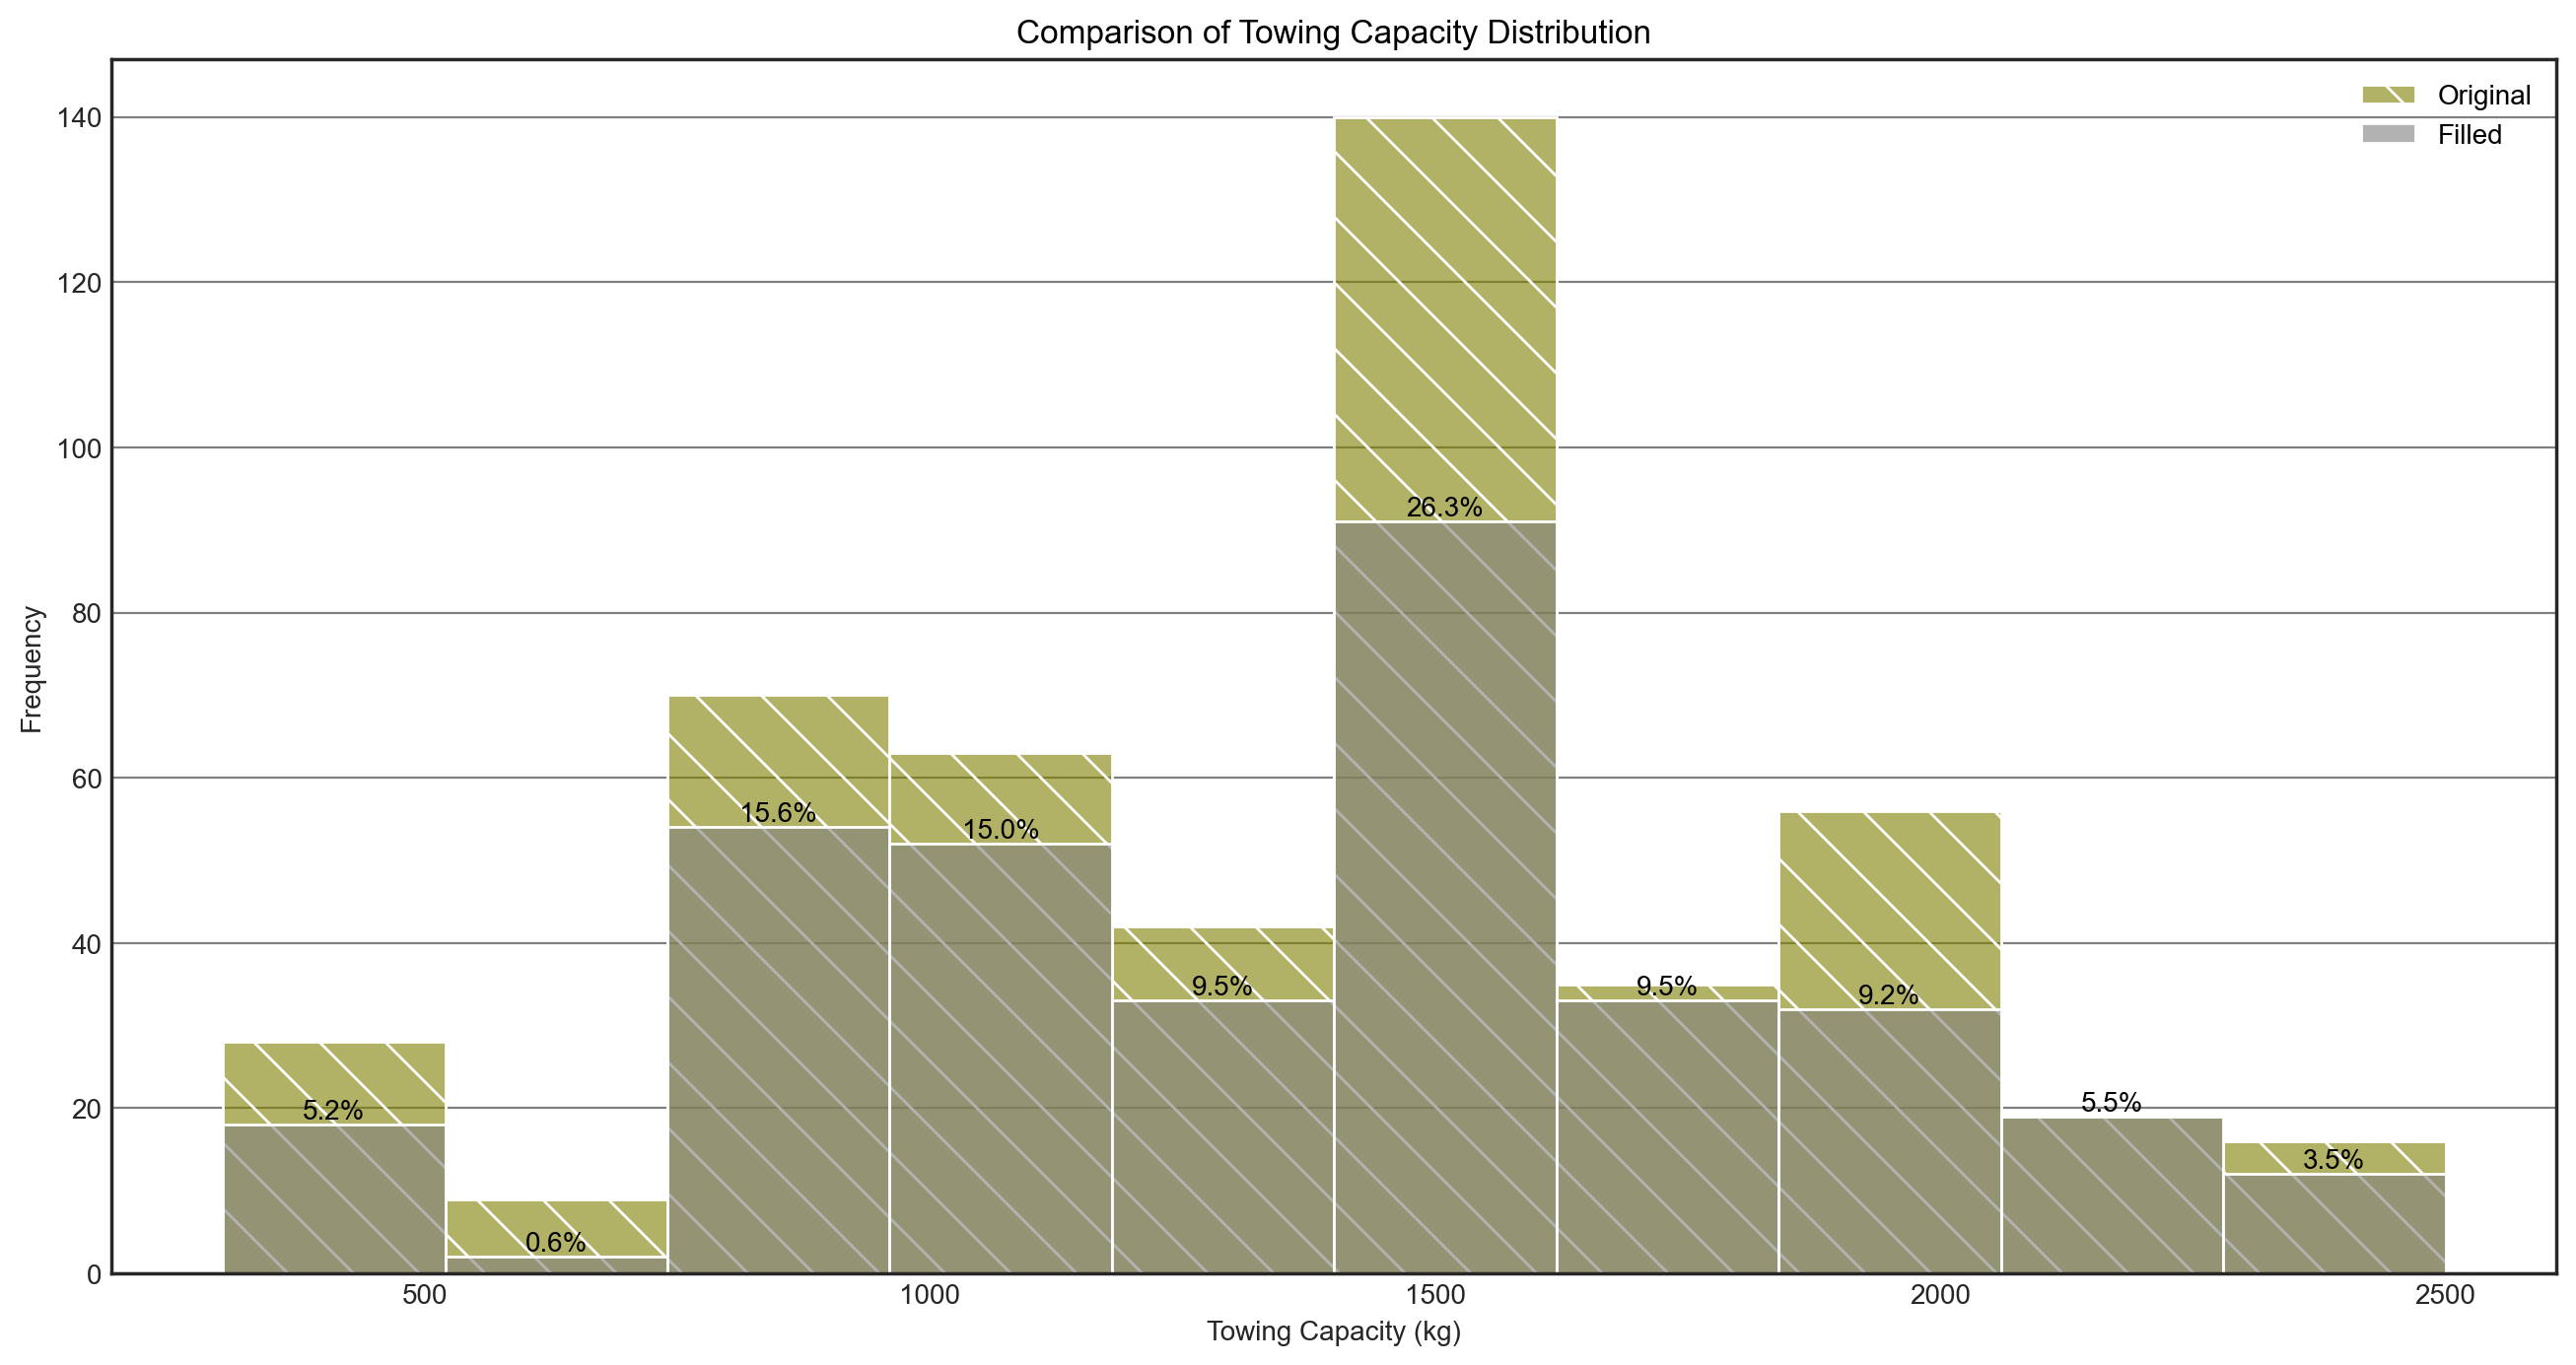


Key Findings:
- Most common filled range: 1400.0 - 1620.0 — 91 vehicles (26.3%)
- Next largest ranges: 740.0 - 960.0 — 54 vehicles (15.6%); 960.0 - 1180.0 — 52 vehicles (15.0%)
- Combined share for 740.0–1620.0 kg: 230 vehicles (66.5%)
- Total filled records counted: 346


In [22]:
# Filter filled towing capacities (>=300)
filled = df_loaded_original.loc[df_loaded_original['towing_capacity_kg'] >= 300, 'towing_capacity_kg'].dropna()

# Shared bins from original data
bins = 10
counts_orig, edges = np.histogram(df['towing_capacity_kg'].dropna(), bins=bins)
counts_filled, _ = np.histogram(filled, bins=edges)

# Build numeric table with percentages
ranges = [f"{edges[i]:.1f} - {edges[i+1]:.1f}" for i in range(len(edges)-1)]
total_filled = counts_filled.sum()
pct = np.round((counts_filled / total_filled * 100) if total_filled>0 else np.zeros_like(counts_filled, dtype=float), 1)
numeric_table = pd.DataFrame({'bin_range': ranges, 'filled_count': counts_filled, 'filled_pct': pct})

# Print numeric table
print("Numeric table for filled towing-capacity distribution:")
print(numeric_table.to_string(index=False))

# Plot both histograms using same edges
fig, ax = plt.subplots(figsize=(16, 8))
histplot = sns.histplot(df['towing_capacity_kg'], bins=edges, color='#808000',
                        label='Original', alpha=0.6, ax=ax)

# Set hatches for the patches in the original histogram to visually differentiate the data
hatches = ['\\']
for num, patch in enumerate(histplot.patches):
    patch.set_hatch(hatches[num % len(hatches)])

# Plot filled on the same Axes
sns.histplot(filled, bins=edges, color='#808080', label='Filled', alpha=0.6, ax=ax)

# Annotate, labels, legend, show
centers = (edges[:-1] + edges[1:]) / 2
for c, h, p in zip(centers, counts_filled, pct):
    if h > 0: ax.annotate(f'{p:.1f}%', (c, h), ha='center', va='bottom', color='black')

ax.set_title('Comparison of Towing Capacity Distribution')
ax.set_xlabel('Towing Capacity (kg)')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')
ax.grid(axis='y')
plt.show()

# Summary stats: top 3 ranges and combined 740–1620
top = numeric_table.sort_values('filled_count', ascending=False).reset_index(drop=True)
combined_mask = [(edges[i] < 1620.0) and (edges[i+1] > 740.0) for i in range(len(edges)-1)]
combined_count = int(counts_filled[np.array(combined_mask)].sum())
combined_pct = (combined_count / total_filled * 100) if total_filled>0 else 0.0
total = int(total_filled)

# Print key findings
print("\nKey Findings:")
if len(top) >= 3:
    print(f"- Most common filled range: {top.iloc[0]['bin_range']} — {int(top.iloc[0]['filled_count'])} vehicles ({top.iloc[0]['filled_pct']}%)")
    print(
    f"- Next largest ranges: {top.iloc[1]['bin_range']} — {int(top.iloc[1]['filled_count'])} vehicles ({top.iloc[1]['filled_pct']}%); "
    f"{top.iloc[2]['bin_range']} — {int(top.iloc[2]['filled_count'])} vehicles ({top.iloc[2]['filled_pct']}%)"
)
else:
    for i in range(len(top)):
        print(f"- Rank {i+1}: {top.iloc[i]['bin_range']} — {int(top.iloc[i]['filled_count'])} vehicles ({top.iloc[i]['filled_pct']}%)")
print(f"- Combined share for 740.0–1620.0 kg: {combined_count} vehicles ({combined_pct:.1f}%)")
print(f"- Total filled records counted: {total}")

In [23]:
# Select only numeric columns from df and compute their pairwise correlation matrix
num = df.select_dtypes(include='number') # Pearson correlation matrix between numeric features
num.corr()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,length_mm,width_mm,height_mm,torque_nm_mapped,power_to_weight_ratio,efficiency
top_speed_kmh,1.000000,0.708486,0.279582,0.784526,0.171242,0.732130,-0.823443,0.772479,0.577035,-0.163085,-0.315572,0.443686,0.535850,-0.462712,0.784526,-0.045161,0.209071
battery_capacity_kWh,0.708486,1.000000,0.139238,0.750632,0.383607,0.880433,-0.643716,0.728903,0.584221,0.099649,0.013413,0.689293,0.731496,-0.055999,0.750632,-0.027816,0.042898
number_of_cells,0.279582,0.139238,1.000000,0.071095,-0.075106,0.237555,-0.202808,0.082774,0.090511,0.098207,0.036106,0.135539,0.160987,-0.118421,0.071095,0.002259,0.980633
torque_nm,0.784526,0.750632,0.071095,1.000000,0.369650,0.641469,-0.778560,0.655715,0.579804,-0.049243,-0.161651,0.505580,0.565094,-0.194121,1.000000,-0.402375,0.001728
efficiency_wh_per_km,0.171242,0.383607,-0.075106,0.369650,1.000000,0.022943,-0.066512,0.183932,0.399646,0.384064,0.522634,0.644838,0.573535,0.512614,0.369650,-0.237534,-0.116569
range_km,0.732130,0.880433,0.237555,0.641469,0.022943,1.000000,-0.712486,0.721776,0.468901,-0.073621,-0.248784,0.496867,0.521392,-0.413798,0.641469,0.082825,0.156863
acceleration_0_100_s,-0.823443,-0.643716,-0.202808,-0.778560,-0.066512,-0.712486,1.000000,-0.629817,-0.499271,0.285330,0.441376,-0.254990,-0.395869,0.494811,-0.778560,0.220593,-0.142704
fast_charging_power_kw_dc,0.772479,0.728903,0.082774,0.655715,0.183932,0.721776,-0.629817,1.000000,0.611796,-0.022779,-0.127318,0.476166,0.575491,-0.287748,0.655715,0.359251,0.018154
towing_capacity_kg,0.577035,0.584221,0.090511,0.579804,0.399646,0.468901,-0.499271,0.611796,1.000000,-0.007806,0.033590,0.482482,0.542770,-0.024951,0.579804,-0.044708,0.035979
cargo_volume_l,-0.163085,0.099649,0.098207,-0.049243,0.384064,-0.073621,0.285330,-0.022779,-0.007806,1.000000,0.480239,0.458614,0.376764,0.566006,-0.049243,0.007059,0.105776


In [24]:
# Sort rows by top_speed_kmh ascending, reassign a zero-based index
df = df.sort_values('top_speed_kmh').reset_index(drop=True)  
df

,brand,car_model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,segment,length_mm,width_mm,height_mm,car_body_type,manufacturing_country,torque_nm_mapped,power_to_weight_ratio,efficiency,power_to_weight_category
0,Dacia,Spring Electric 45,125,25.0,Lithium-ion,72.0,125.000000,109,165.0,19.1,...,A - Mini,3700,1622,1516,Hatchback,Romania,92.195250,0.232000,2.880000,Low
1,Dacia,Spring Electric 65,125,25.0,Lithium-ion,72.0,113.000000,114,160.0,13.7,...,A - Mini,3700,1622,1516,Hatchback,Romania,83.344506,0.256637,2.880000,Medium
2,Citroen,e-SpaceTourer XL 50 kWh,130,46.3,Lithium-ion,216.0,220.000000,219,180.0,13.3,...,N - Passenger Van,5333,1920,1890,Small Passenger Van,France,162.263640,0.354545,4.665227,Medium
3,Peugeot,e-Traveller L2 75 kWh,130,68.0,Lithium-ion,324.0,270.000000,202,260.0,14.2,...,N - Passenger Van,4983,1920,1890,Small Passenger Van,France,199.141740,0.292593,4.764706,Medium
4,Peugeot,e-Traveller L3 50 kWh,130,46.3,Lithium-ion,216.0,270.000000,219,180.0,13.3,...,N - Passenger Van,5333,1920,1890,Small Passenger Van,France,199.141740,0.288889,4.665227,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Tesla,Model S Plaid,282,95.0,Lithium-ion,7920.0,498.012739,158,560.0,2.3,...,F - Luxury,5021,1987,1431,Liftback Sedan,USA,367.315272,0.281117,83.368421,Medium
474,Maserati,GranCabrio Folgore,290,83.0,Lithium-ion,216.0,1350.000000,198,395.0,2.8,...,F - Luxury,4966,1957,1365,Cabriolet,Italy,995.708700,0.140741,2.602410,Low
475,Porsche,Taycan Turbo GT,290,97.0,Lithium-ion,396.0,1340.000000,184,475.0,2.3,...,F - Luxury,4968,1966,1378,Sedan,Germany,988.333080,0.209701,4.082474,Low
476,Porsche,Taycan Turbo GT Weissach,305,97.0,Lithium-ion,396.0,1340.000000,180,475.0,2.2,...,F - Luxury,4968,1966,1378,Sedan,Germany,988.333080,0.209701,4.082474,Low


In [25]:
# Function reorders dataframe columns and outputs to csv file
def reorder_dataframe(df, before_indices, after_indices, output_csv_path="../data/cleaned_ev.csv"):
    # Create a copy of the original DataFrame to avoid modifying the original data
    df_copy = df.copy()
    
    # Reorder the DataFrame columns based on the specified after_indices
    df_reordered = df_copy.iloc[:, after_indices]
    # Ensure the number of columns remains unchanged after reordering
    assert df_reordered.shape[1] == df.shape[1], "column count changed"

    # Log the number of columns in the reordered DataFrame for verification
    print(f"Reordered: {df_reordered.shape[1]} columns (original {df.shape[1]}).")
    print("First 8 column names in new order:")
    print(list(df_reordered.columns[:8]))

    # Create a DataFrame to compare original and new column positions
    comparison_df = pd.DataFrame({
        'orig_idx': before_indices,  # Original indices for reference
        'orig_col_name': df.columns[before_indices],  # Original column names for clarity
        'new_pos': after_indices,  # New positions of the columns
        'new_col_name': df_reordered.columns  # New column names after reordering
    })

    # Print the comparison DataFrame to visualize changes in column order
    print(comparison_df.to_string(index=False))

    # Display the reordered column names for confirmation
    print(list(df_reordered.columns))

    # Save the reordered DataFrame to a specified CSV file
    df_reordered.to_csv(output_csv_path, index=False)  
    print(f"\nSaved cleaned dataset to: {output_csv_path}")
    print(f"\nData Types:\n {df_reordered.dtypes}")  # Display data types of each column


before_indices = list(range(26))  # Original indices for the first 25 columns
after_indices = [0, 1, 16, 15, 14, 2, 9, 6, 22, 23, 25, 3, 5, 4, 7, 24, 10, 11, 8, 12, 13, 17, 18, 19, 20, 21]

reorder_dataframe(df, before_indices, after_indices)  # Call the function with the DataFrame and indices

Reordered: 26 columns (original 26).
First 8 column names in new order:
['brand', 'car_model', 'segment', 'drivetrain', 'seats', 'top_speed_kmh', 'acceleration_0_100_s', 'torque_nm']
 orig_idx             orig_col_name  new_pos              new_col_name
        0                     brand        0                     brand
        1                 car_model        1                 car_model
        2             top_speed_kmh       16                   segment
        3      battery_capacity_kWh       15                drivetrain
        4              battery_type       14                     seats
        5           number_of_cells        2             top_speed_kmh
        6                 torque_nm        9      acceleration_0_100_s
        7      efficiency_wh_per_km        6                 torque_nm
        8                  range_km       22          torque_nm_mapped
        9      acceleration_0_100_s       23     power_to_weight_ratio
       10 fast_charging_power_kw_dc 